In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

#!pip install geopandas
import geopandas as gd

In [2]:
# define working directory
working_dir = '/Users/Sophie/Desktop/CUAHSI/nextgen-form-eval/Calibration'

# define basin list dir
basin_dir = '/Users/Sophie/Desktop/CUAHSI/Data'

# define camel dataset dir
camel_dir = '/Users/Sophie/Desktop/CUAHSI/Data/camels_attributes_v2.0'

# define atmospheric forcing file dir
data_path = '/Users/Sophie/Desktop/CUAHSI/Data'

# Load Data 

## Load Basin Attributes

In [3]:
# read in basin list
basin_filename = 'basin_list_516.txt'
basin_file = os.path.join(basin_dir,basin_filename)

with open(basin_file, "r") as f:
    basin_list = pd.read_csv(f, header=None)

In [4]:
camel_filename = "camels_topo.txt"
camel_file = os.path.join(camel_dir,camel_filename)
with open(camel_file, "r") as f:
    basin_topo = pd.read_csv(f, sep=";")
    basin_topo = basin_topo.set_index("gauge_id")

## Load LSTM  and CFE Performances

In [5]:
with open('cfe_validation_performance_values.csv', "r") as f:
    values_loaded = pd.read_csv(f, header=0)

kge = values_loaded["kge_values"]
kge_values = [float(kge[i][1:-2]) for i in range(len(kge))]

nse = values_loaded["nse_values"]
nse_values = [float(nse[i][1:-2]) for i in range(len(nse))]

nnse_values = 1.0/(2.0-np.array(nse_values))

cfe_values_loaded = {"basin_id":values_loaded["basin_id"],"kge_values":kge_values,"nse_values":nse_values,"nnse_values":nnse_values}
cfe_values_loaded = pd.DataFrame(cfe_values_loaded)
cfe_values_loaded = cfe_values_loaded.set_index('basin_id')

cfe_values_loaded.loc[9306242]

kge_values    -0.532615
nse_values    -4.006166
nnse_values    0.166496
Name: 9306242, dtype: float64

In [6]:
with open('lstm_test_metrics_all.csv', "r") as f:
    lstm_values_loaded = pd.read_csv(f, header=0)
    lstm_values_loaded = lstm_values_loaded.iloc[:,1:5]
    lstm_values_loaded = lstm_values_loaded.set_index("basin")

lstm_nnse = lstm_values_loaded["NNSE"]
lstm_nse = lstm_values_loaded["NSE"]

lstm_values_loaded.loc[9306242]

NSE    -100.597977
fold        fold_9
NNSE      0.009747
Name: 9306242, dtype: object

# Performance Summary

## Box Plots of CFE performance

In [12]:
print(f"length of existing validated basins: {len(kge_values)}.")
print(f"mean kge: {np.mean(kge_values)}.")
print(f"median kge: {np.median(kge_values)}.")
print(f"max kge: {np.max(kge_values)}.")
print(f"min kge: {np.min(kge_values)}.")

print(f"mean nse: {np.mean(nse_values)}.")
print(f"median nse: {np.median(nse_values)}.")
print(f"max nse: {np.max(nse_values)}.")
print(f"min nse: {np.min(nse_values)}.")

print(f"mean nnse: {np.mean(nnse_values)}.")
print(f"median nnse: {np.median(nnse_values)}.")
print(f"max nnse: {np.max(nnse_values)}.")
print(f"min nnse: {np.min(nnse_values)}.")

length of existing validated basins: 495.
mean kge: 0.31629732686868683.
median kge: 0.5112264.
max kge: 0.8776552.
min kge: -6.4741077.
mean nse: -0.6320403576565656.
median nse: 0.2068568.
max nse: 5.11766016.
min nse: -69.2542332.
mean nnse: 0.526424024093814.
median nnse: 0.5575962338612134.
max nnse: 0.8513925760099879.
min nnse: -0.32075336909074786.


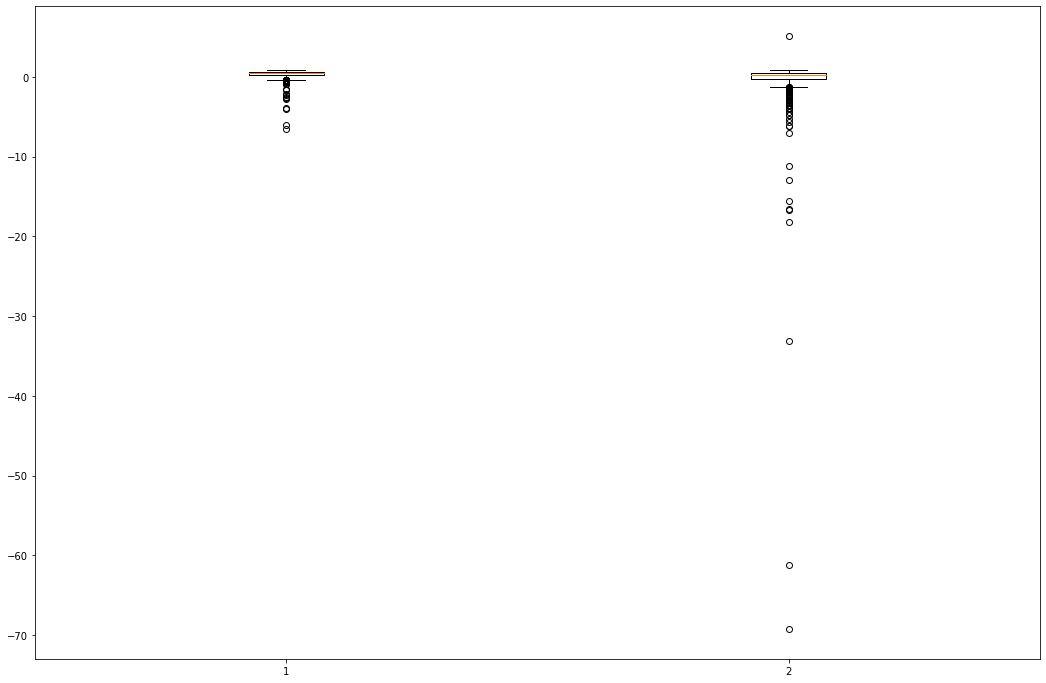

In [8]:
plt.figure(figsize = (18,12))
plt.boxplot([kge_values,nse_values])
plt.show()

## Creat data Dict

In [14]:
basin_performance = {}
basin_performance["basin_id"] = []
basin_performance["gauge_lat"] = []
basin_performance["gauge_lon"] = []
basin_performance["cfe_kge"] = []
basin_performance["cfe_nse"] = []
basin_performance["cfe_nnse"] = []
basin_performance["lstm_nnse"] = []

for i in range(len(kge_values)): 
    basin_id = values_loaded['basin_id'][i] 
    basin_performance['basin_id'].append(basin_id)

    basin_performance["gauge_lat"].append(basin_topo.loc[basin_id]['gauge_lat'])
    basin_performance["gauge_lon"] .append(basin_topo.loc[basin_id]['gauge_lon'])

    basin_performance['cfe_kge'].append(cfe_values_loaded.loc[basin_id]['kge_values'])
    basin_performance["cfe_nse"].append(cfe_values_loaded.loc[basin_id]['nse_values'])
    basin_performance["cfe_nnse"].append(cfe_values_loaded.loc[basin_id]['nnse_values'])

    basin_performance['lstm_nnse'].append(lstm_values_loaded.loc[basin_id]["NNSE"])

df_basin_performance = pd.DataFrame(basin_performance)
df_basin_performance = df_basin_performance.set_index("basin_id")

df_basin_performance
#df_basin_performance.to_csv('models_performance.csv')

,gauge_lat,gauge_lon,cfe_kge,cfe_nse,cfe_nnse,lstm_nnse
basin_id,,,,,,
1547700,41.05951,-77.60583,0.665875,0.436128,0.639439,0.718509
5503800,39.58483,-91.99349,0.466860,-0.129204,0.469659,0.673789
6906800,38.70225,-92.97883,0.225974,-0.130307,0.469416,0.604560
3498500,35.78562,-83.88460,0.747604,0.591611,0.710031,0.728393
1548500,41.52174,-77.44748,0.622476,0.379761,0.617193,0.854488
...,...,...,...,...,...,...
2450250,34.28538,-87.39891,0.750560,0.602427,0.715526,0.732193
3473000,36.65178,-81.84401,0.463206,0.197267,0.554713,0.760352
2464000,33.47928,-87.59723,0.701286,0.546751,0.688113,0.740047


# Map Model Performances

## Map Calibrated CFE Performance

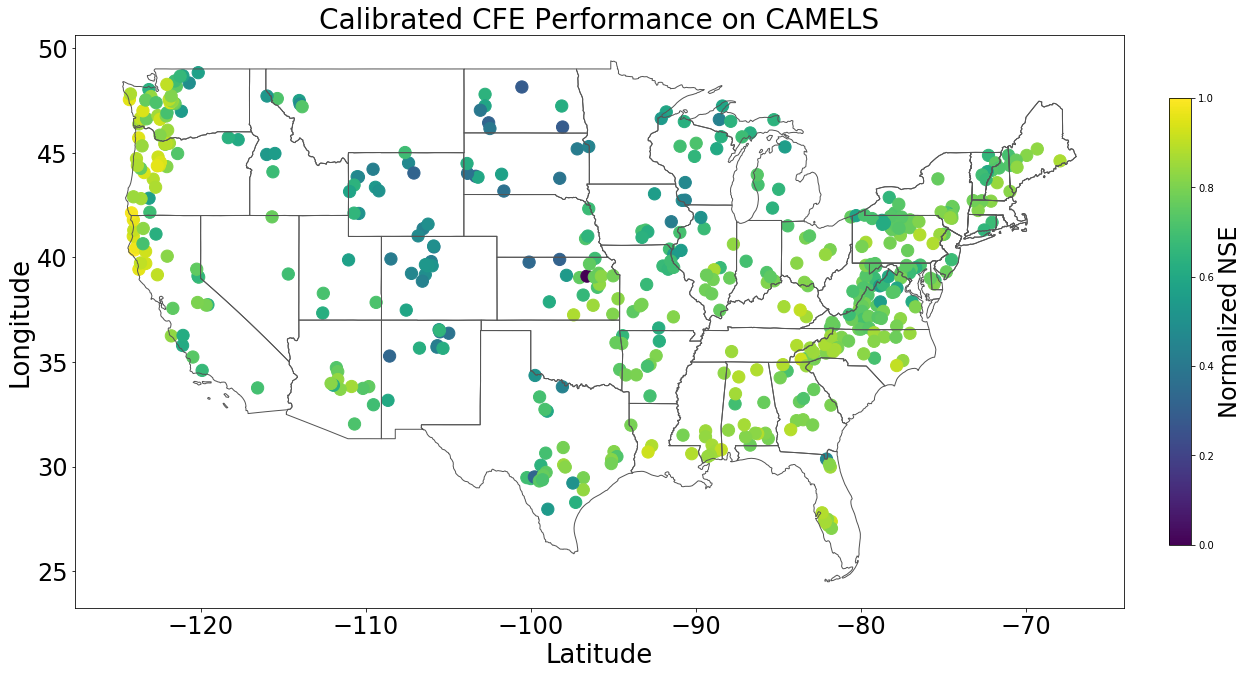

In [10]:
from shapely.geometry import Point

states = gd.read_file(os.path.join(data_path,'usa-states-census-2014.shp'))
states = states.to_crs("EPSG:4326")

lat = df_basin_performance['gauge_lat']
lon = df_basin_performance["gauge_lon"]
geometry = [Point(xy) for xy in zip(lon,lat)]
geo_df = gd.GeoDataFrame(geometry = geometry)
geo_df['cfe_nnse'] = df_basin_performance['cfe_nnse'].values
geo_df.crs = ("EPSG:4326")

fig, ax = plt.subplots(1, 1, figsize=(20, 24))
base = states.boundary.plot(ax=ax,color="#555555", linewidth=1)
geo_df.plot(column = "cfe_nnse",ax = base, markersize=150,cmap='viridis',legend = False)
cbar = plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0,vmax = 1), cmap='viridis')
ax.tick_params(axis='x', labelsize= 24)
ax.tick_params(axis='y', labelsize= 24)
plt.xlabel('Latitude',fontsize = 26)
plt.ylabel('Longitude',fontsize = 26)
plt.colorbar(cbar, ax=ax,fraction=0.02, pad=0.04).set_label(label='Normalized NSE',size=24)
plt.title("Calibrated CFE Performance on CAMELS", fontsize = 28)
plt.show()

## Map Difference between LSTM and CFE

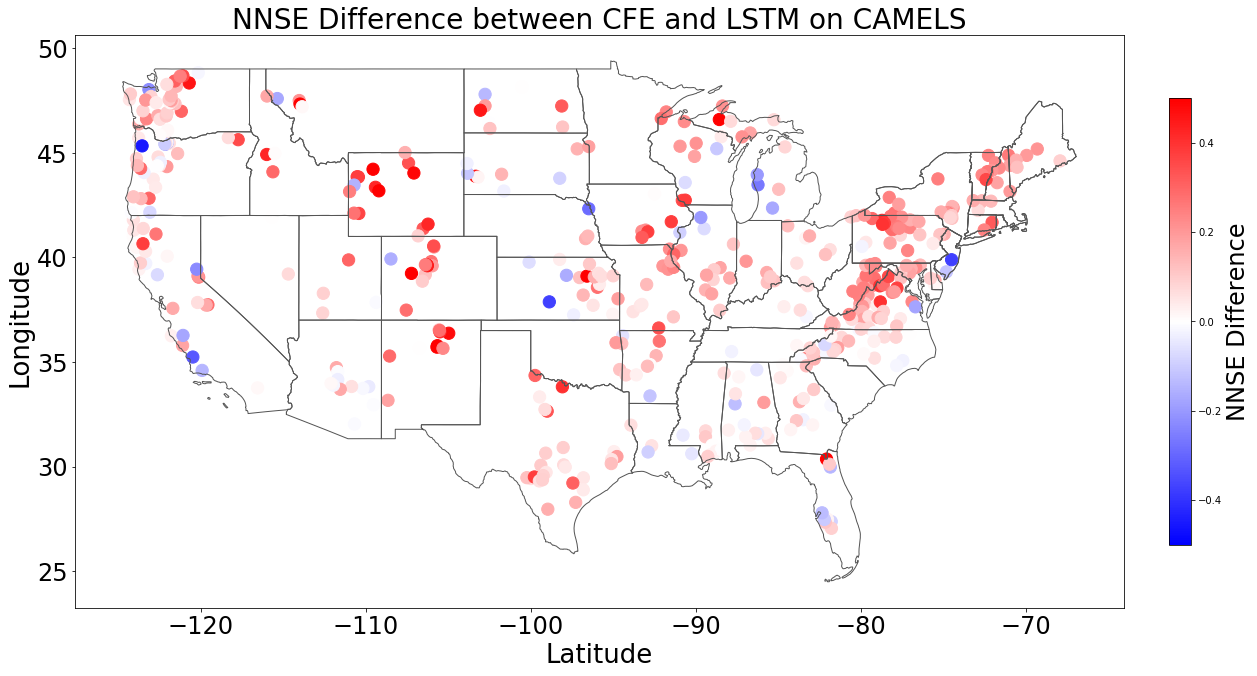

In [11]:
geo_df['lstm_nnse'] = basin_performance['lstm_nnse']
geo_df['nnse_diff'] = basin_performance['lstm_nnse'] - df_basin_performance['cfe_nnse'].values

fig, ax = plt.subplots(1, 1, figsize=(20, 24))
base = states.boundary.plot(ax=ax,color="#555555", linewidth=1)
geo_df.plot(column = "nnse_diff",ax = base, markersize=150,cmap='bwr',legend = False,vmin = -0.5,vmax = 0.5,legend_kwds={'shrink': 0.4,'label':"Difference"})
cbar = plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-0.5,vmax = 0.5), cmap='bwr')
ax.tick_params(axis='x', labelsize= 24)
ax.tick_params(axis='y', labelsize= 24)
plt.xlabel('Latitude',fontsize = 26)
plt.ylabel('Longitude',fontsize = 26)
plt.colorbar(cbar, ax=ax,fraction=0.02, pad=0.04).set_label(label='NNSE Difference',size=24)
plt.title("NNSE Difference between CFE and LSTM on CAMELS", fontsize = 28)
plt.show()

input = basin attributes
target = nse